In [2]:
# default_exp model

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# export
import torch
import torch.nn as nn

from functools import partial
from fastai import *
from fastai.basic_train import Learner

from keraTorch.data import create_db
from keraTorch.layers import *
# from keraTorch.loss import *

In [57]:
# export
class Sequential:
    def __init__(self):
        self.layers = []
        self.last_dim = None
        
    def add(self, layer):
        layer = layer.get_layer(self.last_dim)
        self.last_dim = layer['output_dim']
        self.layers.extend(layer['layers'])
        
    def compile(self, loss, optimizer=None):
        self.model = nn.Sequential(*self.layers)
        self.loss = loss
        
    def fit(self, x, y, bs, epochs, lr=1e-3, one_cycle=True, get_lr=True):
        db = create_db(x, y, bs)
        self.learn = Learner(db, self.model, loss_func=self.loss)
        if one_cycle:
            self.learn.fit_one_cycle(epochs, lr)
        else:
            self.learn.fit(epochs, lr)
               
    def lr_find(self, x, y, bs):
        db = create_db(x, y, bs)
        learn = Learner(db, self.model, loss_func=self.loss)
        learn.lr_find()
        learn.recorder.plot(suggestion=True)
        
    def predict(self, x):
        return self.learn.model(torch.Tensor(x))

In [38]:
from sklearn.datasets import load_iris
import numpy as np

data = load_iris()
x, y = data['data'], data['target']
x.shape, y.shape, x.dtype, y.dtype

((150, 4), (150,), dtype('float64'), dtype('int64'))

In [65]:
model = Sequential()

In [66]:
model.add(Dense(2, x.shape[1], activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(len(data['target_names'])))

In [67]:
import torch.nn.functional as F
model.compile(nn.CrossEntropyLoss())

epoch,train_loss,valid_loss,time
0,1.149410,#na#,00:00
1,1.149410,#na#,00:00
2,1.149410,#na#,00:00
3,1.149410,#na#,00:00
4,1.149410,#na#,00:00
5,1.149410,#na#,00:00
6,1.149410,#na#,00:00
7,1.149410,#na#,00:00
8,1.149410,#na#,00:00
9,1.149410,#na#,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E+00
Min loss divided by 10: 1.10E-01


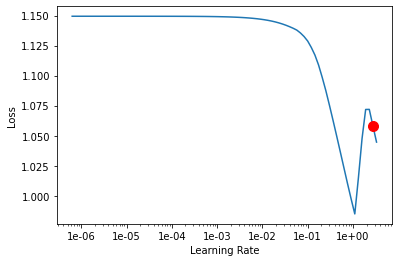

In [68]:
bs = 50
model.lr_find(x, y, bs=bs)

In [69]:
bs = 50
model.fit(x, y, bs, epochs=3, lr=2e-1)

epoch,train_loss,valid_loss,time
0,1.149831,1.125782,00:00
1,1.147949,1.116151,00:00
2,1.135702,1.118873,00:00


In [63]:
model.predict(x)

tensor([[-0.4854,  0.4932,  0.5937],
        [-0.5065,  0.5247,  0.5486],
        [-0.4905,  0.4919,  0.5919],
        [-0.4944,  0.4815,  0.6001],
        [-0.4778,  0.4740,  0.6180],
        [-0.4613,  0.4606,  0.6418],
        [-0.4720,  0.4554,  0.6406],
        [-0.4887,  0.4884,  0.5966],
        [-0.4993,  0.4886,  0.5898],
        [-0.5081,  0.5109,  0.5617],
        [-0.4830,  0.4953,  0.5930],
        [-0.4844,  0.4644,  0.6238],
        [-0.5102,  0.5172,  0.5538],
        [-0.4961,  0.4880,  0.5925],
        [-0.4756,  0.5189,  0.5734],
        [-0.4416,  0.4495,  0.6653],
        [-0.4590,  0.4829,  0.6204],
        [-0.4792,  0.4914,  0.5993],
        [-0.4802,  0.5000,  0.5900],
        [-0.4642,  0.4559,  0.6449],
        [-0.4998,  0.5140,  0.5635],
        [-0.4631,  0.4641,  0.6371],
        [-0.4655,  0.4595,  0.6403],
        [-0.4789,  0.4911,  0.5999],
        [-0.4862,  0.4476,  0.6398],
        [-0.5101,  0.5227,  0.5483],
        [-0.4768,  0.4793,  0.6132],
 